<a href="https://colab.research.google.com/github/OskarKrafft/Machine-Learning-Project/blob/main/02_Data_Exploration_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Set up WD

In [1]:
# Mount GDrive to facilitate data import
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change working directory to project folder
%cd /content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project

/content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project


## Import data and set categoricals

In [6]:
# Importing the data

import pandas as pd
eppes_cleaned = pd.read_csv('eppes_cleaned.csv')
eppes_cleaned = eppes_cleaned.drop(eppes_cleaned.columns[0], axis = 1)
eppes_cleaned

,q1.1,q1.2,q1.3,q1.4,q1.5,q1.6,q1.7,q1.8,q1.9,q1.10,...,d43a,d43b,d46.8,d60,d62_1,d62_2,d63,d72_1,d72_2,d77
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,3.0,6.0,1.0,3.0,3.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,3.0,2.0,6.0,3.0,2.0,2.0,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
27460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
27461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,3.0,6.0,6.0,3.0,4.0,2.0,2.0
27462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,6.0,6.0,4.0,2.0,2.0,2.0


In [7]:
eppes_cleaned.dtypes.value_counts()

float64    290
dtype: int64

In [8]:
# Import Excel sheet containing column indeces to be dropped

columns_analysis = pd.read_excel(r'Drop_Columns_categorical.xlsx')
columns_analysis = columns_analysis.drop(columns_analysis.columns[[0]], axis = 1)

In [9]:
# Create list of names of categorical columns 

col_names_categorical = []

for i in range(872):
  if columns_analysis.iloc[i, 3] == 'categorical':
    col_names_categorical.append(columns_analysis.iloc[i, 1])

In [10]:
# Change datatype of categorical variables to object

eppes_cleaned[col_names_categorical] = eppes_cleaned[col_names_categorical].astype('object')

eppes_cleaned.dtypes.value_counts()

object     147
float64    143
dtype: int64

## Data Exploration and Visualisation

In [19]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Voting behavior count (total = 27464)')]

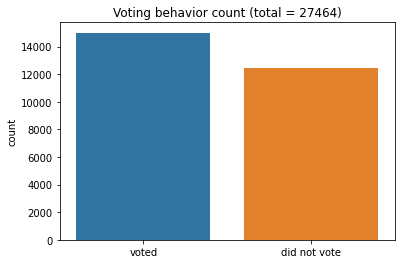

In [30]:
# voting behavior total
countplot = sns.countplot(eppes_cleaned["qg1"], order=eppes_cleaned["qg1"].value_counts(ascending=False).index)
countplot.set(xlabel='', ylabel='count')
countplot.set(xticklabels=["voted", "did not vote"])
countplot.set(title='Voting behavior count (total = 27464)')

In [33]:
# voting behavior and age
catplot = sns.catplot(data=eppes_cleaned, x="qg1", y="d11", hue="d10", kind="box")
catplot.set(xlabel='voting behavior', ylabel='age')
catplot.set(xticklabels=["voted", "did not vote"])
catplot.set(title='Voting behavior by age')

ValueError: ignored